## Exercises and supplementary notes - Week 4, Session AM1

We'll be using the same tools that we used last week for this session.

- [pandas](pandas.pydata.org) for data handling (our dataframe library)
- [seaborn](seaborn.pydata.org) for _nice_ data visualization

Shortly we'll also by trying out:

- [scikit-learn](scikit-learn.org) an extensive machine learning library.
- [numpy](numpy.org) - a fundamental maths library best used by people with a strong maths background.  We won't explore it much today, but it does have some useful methods that we'll need.  It underlies all other mathematical and plotting tools that we use in Python.

We'll be using scikit-learn over the next few weeks, and it's well worth reading the documentation and high level descriptions.

As before, the aim is to get familiar with code-sharing workflows - so we will be doing pair programming for the duration of the day! _You will probably want to take a moment to look at the documentation of the libraries above - especially pandas_

The other useful resource is Stack Overflow - if you have a question that sounds like 'how do I do {x}' then someone will probably have answered it on SO. Questions are also tagged by library so if you have a particular pandas question you can do something like going to https://stackoverflow.com/questions/tagged/pandas (just replace the 'pandas' in the URL with whatever library you're trying to use.

Generally answers on SO are probably a lot closer to getting you up and running than the documentation. Once you get used to the library then the documentation is generally a quicker reference. We will cover strategies for getting help in class.


## Git links

We will be working through using GitHub and GitKraken to share code between pairs. We will go through all the workflow in detail in class but here are some useful links for reference:

- GitKraken interface basics: https://support.gitkraken.com/start-here/interface
- Staging and committing (save current state -> local history): https://support.gitkraken.com/working-with-commits/commits
- Pushing and pulling (sync local history <-> GitHub history): https://support.gitkraken.com/working-with-repositories/pushing-and-pulling
- Forking and pull requests (request to sync your GitHub history <-> someone else's history - requires a _review_):
  - https://help.github.com/articles/about-forks/
  - https://help.github.com/articles/creating-a-pull-request-from-a-fork/

## Exercise: Robust Regression

Last week we used Scikit-Learn and Seaborn to do least-squares linear regression.  This is the same kind of linear regression that you've applied countless times in Excel.  We reframed it in the context of machine learning by creating a target array with labels, a features matrix, and then we used the fit method to train the model and the predict method to try to predict labels on new observations.  

As was highlighted by Oscar last week, the common linear regression approach aims to find a line that minimised the squared error between the predictions that result from that line and the observed labels in the target array.  The statistical consequences of this were discussed.  These included that the distribution of the errors that we see in our observed features is gaussian, also known as the normal distribution or the bell curve.

When the errors are not gaussian we saw that this distorted the linear fit that we found, and made it a poorer predictor than it would have been in the gaussian case.  We ran through an example where we created perfect linear data and then added gaussian noise.  We used Seaborn to do a linear fit and show us the residuals.  In this case we saw residuals that looked scattered in a way that was consistent with gaussian error and that indicated a good fit.

We then repeated this exercise, but this time we added a gamma error to the line.  In this case the residuals looked notably non-gaussian, as the errors were dominated by positive errors.  Try this exercise again, if you've forgotten how the residual plot looked.

As the gamma distribution only provides positive errors, this leads to the question of why there were any negative errors in the residuals at all - that is, why didn't we have a fitted line, with all of the residuals above it?  If the underlying process that we were trying to model met the assumptions of linear least squares then this would have been the case.  But because least-squares error can't properly account for non-gaussian error the linear model was wrongly fitted to the underlying relationship that we were interested in.

Distorted linear models are a general consequence of non-gaussian errors in least squares linear regression.  In this exercise we're going to look at the impact of outliers on linear models, and we're going to try different methods of linear regression that use other measures of line error that are less sensitive to this.

We're going to use some pre-written methods that I've provided in the file week4_help.py, which you should find in the same directory as this notebook.  You'll need to import them.  Please review how we import methods from modules that we've written ourselves.  We did this in week two, so please review your notes from week two if you need to.

It's not important to understand how these methods work, just to be able to use them for the exercise.

Import metal_sulphur_recovery_with_outliers.  Then use:

```metal_sulphur_recovery_with_outliers?```

to read the docstring.

We'll use this to create Pandas dataframes with varying numbers of outliers present.

In [1]:
from week4_help import recovery_sulphur_dataframe_with_outliers

In [2]:
recovery_sulphur_dataframe_with_outliers?

This should have brought up the help for the recovery_sulphur_dataframe_with_outliers method.  It returns data similar to that in the CSV file that was used for the metal recovery vs sulphur exercise that we did in week 3.  If we call this with zero as the parameter then it won't return any outliers.  Let's do that, and then plot the data.

In [3]:
recovery = recovery_sulphur_dataframe_with_outliers(0)

In [4]:
recovery.head()

,metal_recovery_percent,feed_sulphur_percent
0,46.619407,0.241570
1,68.538719,1.085903
2,64.737393,0.676091
3,68.121452,1.018158
4,69.664892,1.323587


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

[(0, 100),
 Text(0,0.5,'recovery %'),
 (0, 1.5),
 Text(0.5,0,'feed sulphur %'),
 Text(0.5,1,'% metal recovery vs % sulphur in feed')]

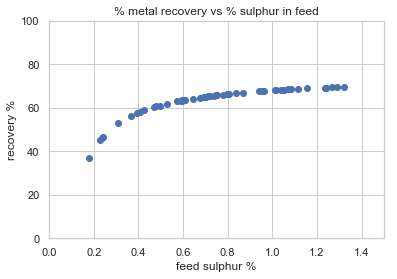

In [6]:
ax = plt.axes()
ax.plot(recovery['feed_sulphur_percent'], recovery['metal_recovery_percent'], 'o')
ax.set(xlim=(0, 1.5), ylim=(0, 100), xlabel='feed sulphur %', ylabel='recovery %',
      title='% metal recovery vs % sulphur in feed')

Now lets use Seaborn to try and fit a least squares linear regression to this plot, as we did in week 3.  We'll pretend that we don't know about the reciprocal transformation that we applied to this, for the sake of seeing what happens.

C:\Users\fra256\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


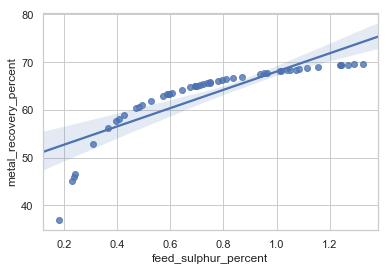

In [7]:
sns.regplot('feed_sulphur_percent', 'metal_recovery_percent', recovery)

Note the confidence intervals in light blue that Seaborn has helpfully provided!  As you can see, confidence intervals are not very meaningful when you data doesn't conform with the assumptions of least-squares linear regression.  Without the reciprocal transform the data is not linear, and so the residuals aren't gaussian - they have a structure to them.  You can see that for low and high values of feed_sulphur the residuals are negative, but they go positive for middle values.  It may be helpful to review the PowerPoint presentation on linear regression from week 3, which highlights this as a behaviour that indicates the underlying assumptions of least squares linear regression aren't be met.

Let's transform the data to make it more linear.  We can use the transform pipeline when using scikit-learn, but it's not available when using seaborn, so we'll do it in the more basic way that we used last week - we'll simply apply "1/" to the feed_sulphur_percent.

In [8]:
recovery['reciprocal_feed_sulphur'] = 1/recovery['feed_sulphur_percent']

[(0, 100),
 Text(0,0.5,'recovery %'),
 (0.6, 5),
 Text(0.5,0,'1/feed sulphur %'),
 Text(0.5,1,'% metal recovery vs % sulphur in feed')]

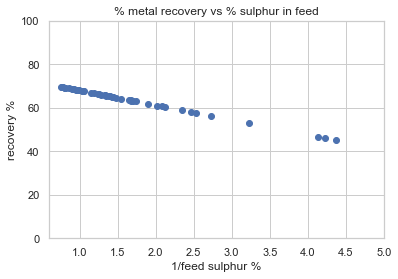

In [9]:
ax = plt.axes()
ax.plot(recovery['reciprocal_feed_sulphur'], recovery['metal_recovery_percent'], 'o')
ax.set(xlim=(0.6, 5), ylim=(0, 100), xlabel='1/feed sulphur %', ylabel='recovery %',
      title='% metal recovery vs % sulphur in feed')

That's better.  Now fitting a linear least squares line should be more sensible.

C:\Users\fra256\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


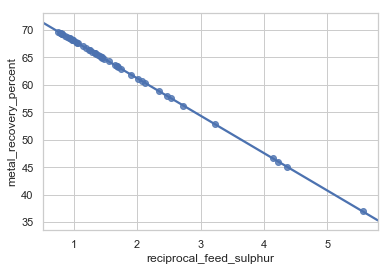

In [10]:
sns.regplot('reciprocal_feed_sulphur', 'metal_recovery_percent', recovery)

But what happens if we add outliers?  Outliers are an example of non-gaussian error and lead to poor least squares fits.  In practice, you can include them in a model if you understand the impact that they'll have on the regression, or you can take them out if why they are in the data is understood and it makes sense in the industry domain to ignore them.  But if they're being included in the model it often means that least squares will give you poor results and you should consider other line fitting methods.

In [11]:
recovery = recovery_sulphur_dataframe_with_outliers(0.2)

C:\Users\fra256\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


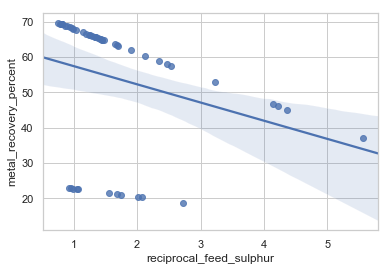

In [12]:
recovery['reciprocal_feed_sulphur'] = 1/recovery['feed_sulphur_percent']
sns.regplot('reciprocal_feed_sulphur', 'metal_recovery_percent', recovery)

Now that we've added a few outliers we see the terrible fit that only a few well placed outliers can cause.  These outliers are said to have "high leverage" because they are far away from the rest of the data, and like having a long lever, they can move the earth (or at least your line).  Seaborn has a built in method for providing robust fitting.  Look in the help and try it out.

In [13]:
sns.regplot?

C:\Users\fra256\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\robust\robust_linear_model.py:278: RuntimeWarning: divide by zero encountered in true_divide
  self.weights = self.M.weights(wls_results.resid/self.scale)
C:\Users\fra256\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\robust\robust_linear_model.py:278: RuntimeWarning: invalid value encountered in true_divide
  self.weights = self.M.weights(wls_results.resid/self.scale)
C:\Users\fra256\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\robust\norms.py:190: RuntimeWarning: invalid value encountered in less_equal
  return np.less_equal(np.fabs(z), self.t)
C:\Users\fra256\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\fra256\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\linalg\linalg.py:1864: RuntimeWarning: invalid v

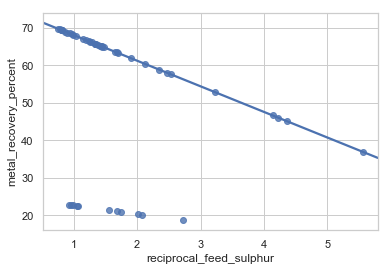

In [14]:
recovery['reciprocal_feed_sulphur'] = 1/recovery['feed_sulphur_percent']
sns.regplot('reciprocal_feed_sulphur', 'metal_recovery_percent', recovery, robust=True)

That's much better!  Robust methods are based on ways of measuring central tendency other than the mean average.  Lets see what happens when I want to find an average weight and I have five people, with one being an outlier.

Weights: 72, 68, 76, 62 and 38 kilograms

If I take a mean average, it'd suggest that the average weight of peeople is about (38+62+68+72+76)/5 = 63kg.

Given the numbers that we have, this would seem a bit low.  This is analogous to how least-squares finds a mean average line through the data.

If instead we use a median average, which orders all of the numbers and picks the one in the middle (the 3rd, in a list of five numbers), then we get an average of 68kg.  This is closer to what seems intuitively correct, even with the 38kg outlier.  This is an example of how robust linear regression works, and in fact a method called Thiel-Sen regression does exactly this - it finds the median line through the data.

Robust fitting methods are only resistant to outliers to a degree, and, depending on the specifics of the data and how many outliers are present, even robust methods fall over at some point.  This is often called the breakdown point of the method.  Sometimes there is underlying theory that can predict this, but often it's better to keep using exploratory visual tools to valid our models.

C:\Users\fra256\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


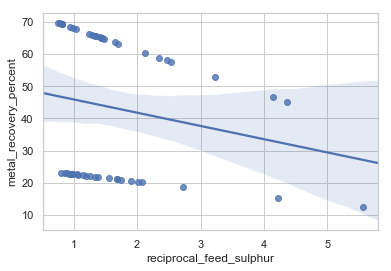

In [15]:
# Increasing the outliers parameter to 0.5 we find that we've passed
# the breakdown point for Seaborn's robust linear regression method.
recovery = recovery_sulphur_dataframe_with_outliers(0.5)
recovery['reciprocal_feed_sulphur'] = 1/recovery['feed_sulphur_percent']
sns.regplot('reciprocal_feed_sulphur', 'metal_recovery_percent', recovery, robust=False)

C:\Users\fra256\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


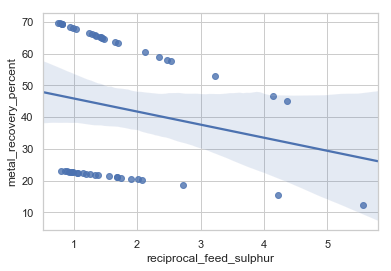

In [16]:
recovery = recovery_sulphur_dataframe_with_outliers(0.5)
recovery['reciprocal_feed_sulphur'] = 1/recovery['feed_sulphur_percent']
sns.regplot('reciprocal_feed_sulphur', 'metal_recovery_percent', recovery, robust=True)

C:\Users\fra256\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\robust\robust_linear_model.py:278: RuntimeWarning: divide by zero encountered in true_divide
  self.weights = self.M.weights(wls_results.resid/self.scale)
C:\Users\fra256\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\robust\robust_linear_model.py:278: RuntimeWarning: invalid value encountered in true_divide
  self.weights = self.M.weights(wls_results.resid/self.scale)
C:\Users\fra256\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\robust\norms.py:190: RuntimeWarning: invalid value encountered in less_equal
  return np.less_equal(np.fabs(z), self.t)
C:\Users\fra256\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\fra256\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\linalg\linalg.py:1864: RuntimeWarning: invalid v

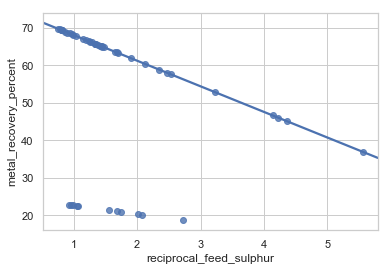

In [17]:
# Let's try reducing the outliers parameter to 0.2.
recovery = recovery_sulphur_dataframe_with_outliers(0.2)
recovery['reciprocal_feed_sulphur'] = 1/recovery['feed_sulphur_percent']
sns.regplot('reciprocal_feed_sulphur', 'metal_recovery_percent', recovery, robust=True)

Now let's try this using scikit-learn.  It has a greater range of robust methods available than Seaborn, and they are used in the same way that least squares linear regression is used.

Remember the sequence of steps for using scikit-learn for linear regression:

### Refresher from week 3: The Estimator API of scikit-learn

1. Choose a class of model by importing the appropriate estimator class.  In our case we want to import least squares linear regression first.  Here's how we can do it.

First import LinearRegression from scikit-learn.  Use this code:

```from sklearn.linear_model import LinearRegression```

Now create an "instance" of the LinearRegression class.  We can do it like this:

```model = LinearRegression(fit_intercept=True)```

To check that this has worked look at the model object after it's created.  It should tell you about some of its settings.

```model```

2. Next we need to arrange a pandas dataframe into a features matrix and a target vector.

The notation is a bit strange!  The two pairs of "[ ]" as "[[ ]]" that you will see for the features matrix is correct.  These square brackets aren't needed in multivariate cases, they are only required for this univariate case, which is a simpler situation than scikit-learn is usually used for.

3. Fit the model to your data by using the fit() method of the LinearRegression object.

Look at the documentation for how to apply this.  You'll need to provide your features matrix (X) and target vector (y) as parameters to the fit method.

```model.fit(X, y)```

As this is a two dimensional linear model, it has two parameters.  The line's intercept and slope.  The notation that scikit-learn uses is a little unfriendly.  Its convention is to add underscores to the names of the parameters it finds.  Also, it calls the slope "coef".

After fitting the model, find the coefficients with ```model.coef_``` and ```model._intercept_```.

#### Now that we've trained a model, we should make predictions!

6. Make predictions!

This is also more complicated with scikit-learn than it is with Seaborn.

For a given, single value for a feature (ie a meal cost) we can predict a label.  For example, for a meal cost of $20, we could make a prediction with:

```predicted_tip = model.predict(20)```

But to find the smooth line that seaborn finds we need to explicitly tell scikit-learn that we want to do a prediction for all of the meal costs that we're interested in.  To do this we
use a new library called "numpy" and a method called linspace (which is short for linear spacing).

First we need to import numpy.

```import numpy as np```

While I used predicted_tip above as an example of a predicted target array, and 20 is an example of x, I'll now switch to the usual y and x conventions used in tutorials with scikit-learn.  You can of course use any variables names you, and in your own code it's best to use descriptive names that mean something in the domain of your industry, like 'predicted_tip", or "octane_rating".

We need to use the linspace method in numpy.  Use it like this:

```xfit = np.linspace(0, 60)```

This will create a collection of meal costs, in order, starting from 0 dollars up to 60 dollars.  This is what we need, but this collection isn't formatted correctly for scikit-learn.  To make it work with scikit-learn we next have to adjust the format with this instruction:

```xfit_reshaped = xfit[:, np.newaxis]
yfit = model.predict(xfit_reshaped).```

yfit now contains our predicted tips.  Type ```yfit``` to see them numerically, or plot them.

In [18]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
features_matrix = recovery[['reciprocal_feed_sulphur']]
target_array = recovery['metal_recovery_percent']
model.fit(features_matrix, target_array)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [19]:
model.coef_

array([-5.15091923])

In [20]:
model.intercept_

62.57978073849143

scikit-learn is able to provide an R^2 value.  If more comprehensive numerical statistics are wanted then statsmodel should be used.  We used this briefly in week 3, and will use it again later today.

Use
```model.score```

In [21]:
model.score(features_matrix, target_array)

0.0815794059186975

In [22]:
import numpy as np
fitted_sulphur_x = recovery['reciprocal_feed_sulphur']

In [23]:
fitted_sulphur_x = fitted_sulphur_x[:, np.newaxis]

In [24]:
recovery['fitted_ls_recovery'] = model.predict(fitted_sulphur_x)

In [25]:
recovery.head()

,metal_recovery_percent,feed_sulphur_percent,reciprocal_feed_sulphur,fitted_ls_recovery
0,46.619407,0.241570,4.139588,41.257098
1,22.846240,1.085903,0.920893,57.836336
2,64.737393,0.676091,1.479091,54.961104
3,22.707151,1.018158,0.982166,57.520725
4,69.664892,1.323587,0.755522,58.688146


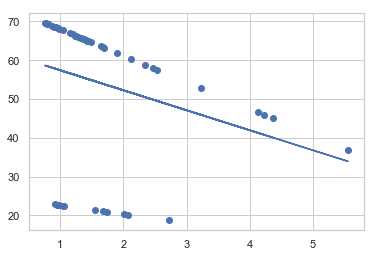

In [26]:
plt.scatter(recovery['reciprocal_feed_sulphur'], recovery['metal_recovery_percent'])
plt.plot(recovery['reciprocal_feed_sulphur'], recovery['fitted_ls_recovery'])

That is pretty much the same fit that we got from Seaborn, when we chose to use least squares linear fitting.  Let's try out the robust estimators that scikit-learn provides:

Our options include:

Theil-Sen:  While least-squares fitting finds a line that best represents the mean average of the points. Theil-Sen is built upon using the median average instead.  The median, which comes about by ordering all of the elements and choosing the element in the middle, is less sensitive to outliers than the mean is.  Theil-Sen is the best of the available estimators when there are outliers in the x direction.  The breakdown point is known from theory to not be better than 29.3%

RANSAC (Random Sample Consensus):  This creates lots of linear models from random subsets of the original data (which may or may not include the outliers).  It then applies the model to all of the original data and looks at the residuals to choose outliers (where an outlier is an observation that has residual greater than some threshold set inside the algorithm).  It does this for all of the models it creates, and chooses the model with the most inliers.  This is the best of the available estimators for outliers in the y direction, which is the normal situation.

Huber Regressor:  This regressor tends to be faster than both RANSAC and Theil-Sen, but often gives poorer results.

Note:  All of these are suitable only for low-dimensional problems, they won't work properly once we go past a few dimensions (and they're best applied with just two dimensions).

Import these in the same way that you import LinearRegression, and then "instantiate" them as you did with LinearRegression:


```from sklearn.linear_model import LinearRegression, TheilSenRegressor, RANSACRegressor, HuberRegressor```


In [27]:
# Here's an example of how to use TheilSen

from sklearn.linear_model import TheilSenRegressor
model = TheilSenRegressor(fit_intercept=True)
features_matrix = recovery[['reciprocal_feed_sulphur']]
target_array = recovery['metal_recovery_percent']
model.fit(features_matrix, target_array)

# Now we can observe the coefficients and plot results using linspace and
# newaxis, and the predict method as we did a few cells above for least
# squares linear regression.  Don't forget to import numpy so that you
# can use linspace and newaxis.

TheilSenRegressor(copy_X=True, fit_intercept=True, max_iter=300,
         max_subpopulation=10000, n_jobs=1, n_subsamples=None,
         random_state=None, tol=0.001, verbose=False)

Exercise:  Try the other robust regressors, and compare their breakdown points in this case.  Use trial an error with these regressors when you apply them to your own problems.



In [28]:
# This can be explored interactively in Python.  Try a range of
# outlier values in the recovery_sulphur_dataframe_with_outliers 
# method.  Then try to fit a line using TheilSenRegressor, 
# RANSACRegressor and HuberRegressor.  Observe how they start
# failing badly with different amounts of outliers.
#
# As a generalisation, choose RANSAC unless you know from other knowledge
# that Theil-Sen or Huber is likely to be better for your situation.

### Exercise:  Template Regression.

In multichannel instrumentation, such as XRD and spectroscopy it's common to have hundred or even thousands of spectral channels.  Often there is prior understanding that means that we know how pure examples of various components would look like in the instrument.  It's also the case that the behaviour of the samples and the instrument is well-approximated as a linear system.  That is, one where the whole is the sum of the known parts.  The problem then is to find out how much of each known part is present in an observation.

Did the whiteboard discussion of a few minutes ago make sense?  If not, this is a good time to ask questions!

This process is a kind of transform.  We want to transform the data from the original feature space, to a new feature space based on how much of each part is present in the observation.  To make it more concrete, if we're using a spectral instrument, which measures light intensity at every nanometre wavelength between 1000nm and 2000nm, then we have a multichannel instrument with about 1000 channels.  Template regression says you know what each of the pure components look like to the spectrometer, and you have reason to think they are additive to make a whole.  The problem then being solved is how much of each of the component parts is present in an observation.  If we have background knowledge that tells us that there could be some combination of three pure components in the observatiosn that we find how much of each is present.  This means we turn how original 1000 features into three new features.

Template regression assumes we know what the features look like.  PCA, which we will look at after this, doesn't make that assumption.  It can try to learn the component features from the data.  So why would you use template regression when, superficially, it doesn't seem as clever as PCA?  Sometimes you don't have any training data for PCA, and sometimes you have prior knowledge about what you may see, and when you have this knowledge it can make sense to use it.

In this example we've created templates for four minerals of interest - quartz, dilithium, red kryptonite and unobtainium.  We also have drill hole data containing observations from 150 samples of these components.  Pick sample 34 and lets use template regression to estimate how much quartz, dilithium, kryptonite and unobtainium are present.

1. First use the template_helper module to create the templates for these four phases.  These methods are probably not generally useful to your problems, so there's no need to understand how they work in detail, just that there is code that creates templates.  In a real-world application you might find these in a scientific database.
2. Plot and observe the templates.  Notice that they overlap sometimes.
3. Create a set of synthetic observations, based on these templates and synthetic compositions
4. Is there any background here?  Do you have backgrounds in your data that you need to remove?  If so, discuss how you might do this with your pair programming partner.  You can discuss this at a conceptual level, you don't need to work out an algorithm in this exercise.  Real data often does contain background and often the first task in machine learning processes is to find and remove this.  How this is done is problem dependent, but if you have knowledge in the field that you're applying machine learning to then you'll likely know the common approaches to removing background.  Otherwise you may need to consult a domain or data science expert.  A common approach is to fit a polynomial around a baseline.  Implementation is too involved to show in this example, but please ask us about this if you have a real-world problem that may need this.  
5. Linear least-squares fit a solution.
6. Don't forget to observe the residuals. Is there a non-gaussian structure in the residuals?
7. Compare the predicted labels against the known labels.  How did it go?

In [29]:
from week4_help import create_templates_matrix, MultichannelXAxis

In [30]:
MultichannelXAxis?

In [31]:
x_axis = MultichannelXAxis(5, 90, 0.2)

The following cells show how templates for our synthetic pure components can be constructed by adding gaussians together to form peaks.  While this is a synthetic example, many real-world problems are modelled as gaussians added together - this is often the case in infrared spectroscopy and also with x-ray isntrumentation.  These instruments are widely used in energy and minerals.

In [32]:
# We make four columns for the phases, but then add an extra column
# so that a constant can be added and modelled.  The purpose of this
# should have been discussed on the whiteboard earlier.  Each column
# must contain an element for every instrument channel.
templates_matrix = np.zeros((x_axis.channel_count, 5))

In [33]:
# We should confirm that we have 426 channels for each of the four
# templates, plus one for the constant column.
templates_matrix.shape

(426, 5)

In [34]:
# This shows that x_axis.as_vector has 426 elements.  Each element
# is a measured feature for each observation.
x_axis.as_vector.shape

(426,)

In [35]:
# _apply_convolution_kernels is a bit mysteriously named, but all it does
# is it creates a gaussian peak of a specified with at particular
# positions within the template.  The details aren't too important, just
# know that we're adding together a collection of peaks to make a full
# template for our pure component.
from week4_help import _apply_convolution_kernals

In [36]:
a_peak = _apply_convolution_kernals(x_axis.as_vector, 10, 25, 4, 3)

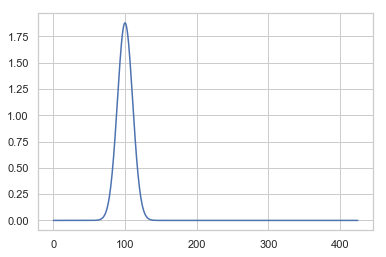

In [37]:
plt.plot(a_peak)

In [38]:
# Now lets create a full template for quartz.  This problem is 
# written in the language of x-ray diffraction, where peaks are
# called "reflections".  Just think of a reflection as a pointy
# area in the squiggly line.

# This makes a list of the parameters that describe each reflection.
# Then we're going to use _apply_convolution_kernals to make those
# describing parameters real as shapes.
from collections import namedtuple
quartz_reflections = []
Reflection = namedtuple('Reflection', ('intensity', 'two_theta', 'broadening'))
first = Reflection(intensity = 10.0, two_theta = 25.0, broadening= 3.0)
quartz_reflections.append (first)
quartz_reflections.append (Reflection(13.0, 38.0, 6.0))
quartz_reflections.append (Reflection(10.0, 43.0, 12.0))
quartz_reflections.append (Reflection(25.0, 12.0, 2.0))

In [39]:
first_reflection_of_quartz = _apply_convolution_kernals(x_axis.as_vector, first.intensity, 
                                                        first.two_theta, 4, first.broadening)

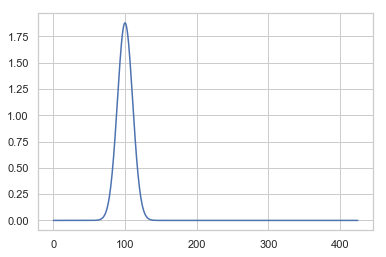

In [40]:
# Here's what the first "reflection" (or peak) looks like.
plt.plot(first_reflection_of_quartz)

In [41]:
# Now we add it to the matrix.  Have you seen the += notation before?
# It means that we add the right hand side to whatever we had before
# on the left hand side and save the result back to the same place.
templates_matrix[:, 0] += first_reflection_of_quartz

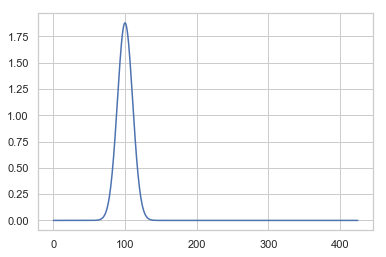

In [42]:
# Lets confirm that this worked properly by plotting the result.  It
# should look the same as first_reflection_of_quartz.
plt.plot(templates_matrix[:, 0])

In [43]:
# Lets keep going with the remaining reflections.
second = quartz_reflections[1]

In [44]:
second_reflection_of_quartz = _apply_convolution_kernals(x_axis.as_vector, second.intensity, 
                                                        second.two_theta, 4, second.broadening)

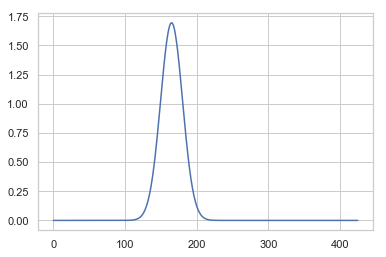

In [45]:
plt.plot(second_reflection_of_quartz)

In [46]:
# Notice how the += operator adds together the two peaks to make a 
# composite shape.
templates_matrix[:, 0] += second_reflection_of_quartz

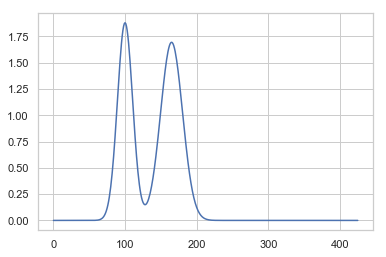

In [47]:
plt.plot(templates_matrix[:, 0])

In [48]:
# Now that you have the gist of how the templates are being created, lets
# just use the create_template_matrix method which will create all of our
# templates this way.
from week4_help import create_templates_matrix

In [49]:
templates = create_templates_matrix()

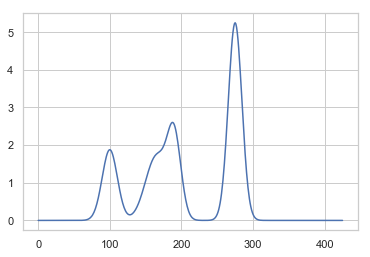

In [50]:
# here's the final quartz template
plt.plot(templates[:, 0])

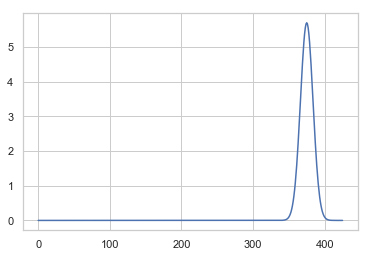

In [51]:
# dilithium
plt.plot(templates[:, 1])

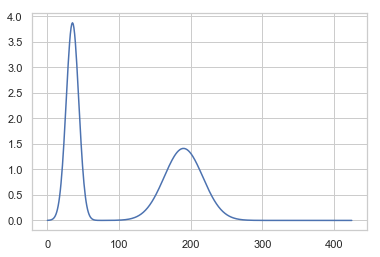

In [52]:
# kryptonite
plt.plot(templates[:, 2])

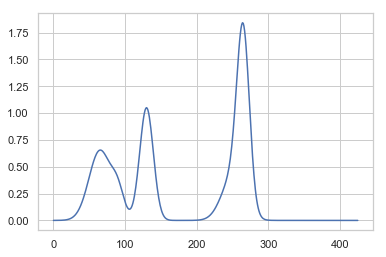

In [53]:
# unobtainium
plt.plot(templates[:, 3])

In [54]:
# Now we have pure components as they might be seen by our
# instrument.  To test our template regression method we
# need to make up some compositions and then multiply our pure
# patterns by these amounts to make the final observed
# patterns.  The underlying assumption is that the observations
# will be a "linear combination" of the parts.

from week4_help import create_composition_dataframe

In [55]:
# Make 50 compositions.  The dataframe we're making can be thought
# of us as the ground truth, or gold standard assays for each pure
# component.
compositions_dataframe = create_composition_dataframe(50)

In [56]:
compositions_dataframe.head()

,Quartz,Dilithium,Kryptonite,Unobtainium
0,5.000000,33.734294,20.051871,5.399245
1,5.000000,34.685407,22.509373,0.145264
2,5.000000,33.691945,22.478866,4.435538
3,32.249339,5.000000,20.669148,5.241627
4,29.202036,27.327283,20.710555,3.489549


In [57]:
# Now we can use create_observations to sum the templates
# in proportion to how much of each pure component is present
# as specified in the compositions_dataframe.  This gives us
# our synthetic observations.
from week4_help import create_observations

In [58]:
# But first, like I did with the template generation, here's how the
# code in create_observations works.  Let's make a single observation
# before using create_observations to create a set of them for us.

import pandas as pd
observations = pd.DataFrame()

In [59]:
observations_count = len(compositions_dataframe)

In [60]:
channels_count = len(templates[:,0])

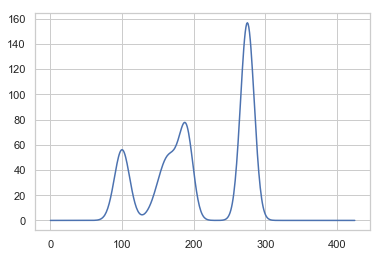

In [61]:
# We sum together the contribution of each phase to create an 
# observation in a similar way to how we summed together peaks
# to make the pure templates.  See if you can follow how
# the arrays are being manipulated below.

plt.plot(templates[:,0]*compositions_dataframe['Quartz'][5])

In [62]:
observation = templates[:,0]*compositions_dataframe['Quartz'][5]

In [63]:
observations_matrix = np.zeros((channels_count, observations_count))

In [64]:
observations_matrix[:, 5]= templates[:,0]*compositions_dataframe['Quartz'][5]

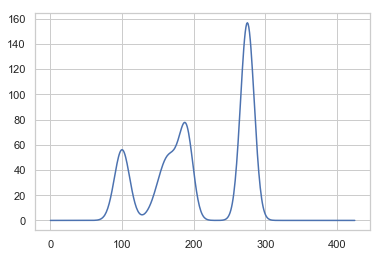

In [65]:
plt.plot(observations_matrix[:, 5])

Now use create_observations and create_composition_dataframe to set up a linear least problem.  Solve it, for a particular observation, using scikit_learn and the estimator API.

In [66]:
observations_matrix = create_observations(compositions_dataframe, templates)

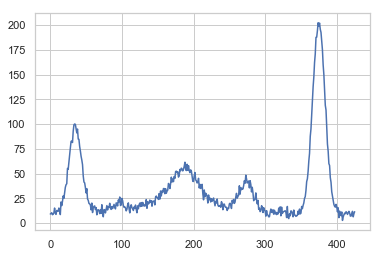

In [67]:
# Let's see the third observation (they start counting from zero)
plt.plot(observations_matrix[:,2])

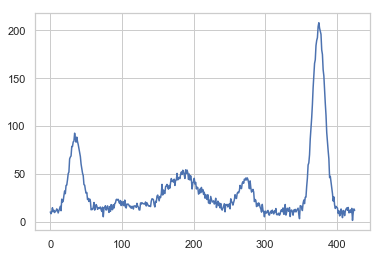

In [68]:
# Let's see the first observation.  Look closely, there is a difference!
plt.plot(observations_matrix[:,0])

Now set up a linear regression to solve for how much of each of our pure components is present in our observations.  This problem is a little bit different to our previous linear regressions in a couple of ways.

The meaning of features is more complex and maybe less intuitive than before.  This is a kind of transform, one that takes us from how much of one set of features is present (the amounts of the two-theta channels) to how much of another set of features is present (the amounts of the templates).  So features have a dual meaning here.

Our instrument gives us 426 features as "two-theta" channels.  Each channel is like a single "x" number, like with feed_sulphur in the earlier channel, but we have 426 of them now.  More interestingly, we want to use linear regression to express each observation in terms of how much of the template arrays are present.  There are 4 of these (plus a template of ones, that is needed for the maths book keeping to work properly).  So our features are now not a single number, but a matrix of templates.  Previously we used the [[]] notation to create a matrix out of the single x variable, but now sklearn is in its element and we can use the templates array as it is as the feature.

What the features are comes out of what the question is that we're asking linear regression to solve for us is.  In some problems we have features, and we have the observed "amount" of each feature present.  This is what we get from our instrument, where each feature is a two-theta.  But the question we want help with is how much of our new template features are present in our observations.

The target array is also less intuitive in this case.  To re-iterate, the problem we're setting up is "How much of each feature is present in an observation?".  A feature in this case is a template.  So the target array is the instrument observations for each of the 426 channels.  The instrument observation now appears in the target array, instead of the features array, like it did with predicting metal recovery from sulphur.

Sometimes, to use machine learning to solve a problem we need to re-formulate the question in a way that makes it more tractable.  Often figuring out what an appropriate set of features is a first and sometimes difficult step that can make a big difference to the results.

use scikit-learn to solve this problem, and solve for the first observation.  It'll only take a few lines, once you've gone through the mental gymnastics to get to it!

The intent of manually playing with the templates and the observations was to help you build up a feel for what the data looks like that you're now trying to make model with.

In [69]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
features_matrix = templates
target_array = observations_matrix[:,0]
model.fit(features_matrix, target_array)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [70]:
model.coef_

array([ 5.11007546, 33.87877433, 19.85885861,  5.28110024,  0.        ])

How do these estimates for our phases compare with the ground truth?

In [74]:
compositions_dataframe.head(1)

,Quartz,Dilithium,Kryptonite,Unobtainium
0,5.0,33.734294,20.051871,5.399245


Not bad!

#### Regularisation

Often your real world problem will have thousands of templates.  Linear least-squares has a habit of finding non-zero amounts of many of the templates it in a database.  This is because the least-squares criteria doesn't concern itself with how many of the templates it finds in an observation.

Why does that matter?  Often, when an instrument sees a sample, we know that the sample will only every contain at most a dozen pure components - it may be the nature of how the small spatial volume that the sample came from, and that there are only so many pure components that are ever likely to be found in such a small space.  But noisy instrument data and operator error, together with the least-squares optimisation goal, can mean that we end up with lots of unreal false-positives for components in our observations.

In this situation we often prefer what are called regularised solvers.  A particular class of regularised solvers, called L1 regularised solvers, have a built-in preference for only seeing a small number of components.

Scikit-learn makes these as easy to do as least squares linear regression.  You should look into this if it may be relevant to your industrial problems.  An example of an L1 regularised solver is "LASSO".

#### What next?

Now that we've transformed our data according to a new, known, lower dimensional "basis", we're ready to tackle the problem of finding an underlying basis when we don't have any templates, but we do have data that we can use for training.  The most well-known and fundemental method for this is Principal Components Analysis (PCA).